# Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [2]:
df_weather = pd.read_csv('cleaned_features_mesowest.csv', index_col='Date_Time')
df_snorkel_ratings = pd.read_csv('cleaned_snorkel_dataset.csv', index_col='date')

In [3]:
df_buoy = pd.read_csv('buoy_data_cleaned.csv', index_col='date')

drop_columns = [ col for col in df_buoy.columns if 'std' in col]
df_buoy.drop(columns = drop_columns, inplace=True)
df_buoy.rename(lambda col: col.replace('_mean','') if 'mean' in col else col, axis=1, inplace=True)


In [4]:
df_weather.index = pd.to_datetime(df_weather.index)
df_snorkel_ratings.index = pd.to_datetime(df_snorkel_ratings.index)
df_buoy.index = pd.to_datetime(df_buoy.index)

In [5]:
#df = df_snorkel_ratings.join([df_weather, df_buoy], how='inner')
df_x = df_buoy.join([df_weather], how='inner')

In [6]:
s_y = df_snorkel_ratings['south_rating'] 
k_y = df_snorkel_ratings['kaanapali_rating']
nw_y = df_snorkel_ratings['northwest_rating']

In [7]:
"""
In order to properly increment data (ie using previous day's data for tomorrow's score)
we must increment the feature's index by one day and join it with the nw_y data again.
""" 

df_x.index = df_x.index + pd.Timedelta(days=2)
df_temp = nw_y.to_frame().join([df_x], how='inner')
nw_y = df_temp['northwest_rating']
df_x = df_temp.drop('northwest_rating', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

#X_s_train, X_s_valid, y_s_train, y_s_valid = train_test_split(df_x, s_y, train_size=0.2)
#X_k_train, X_k_valid, y_k_train, y_k_valid = train_test_split(df_x, k_y, train_size=0.2)
X_nw_train, X_nw_valid, y_nw_train, y_nw_valid = train_test_split(df_x, nw_y, train_size=0.2)

In [9]:
import pickle

with open('2_mesowest_day_model.p', 'rb') as f:
    model = pickle.load(f)

In [10]:
model.score(X_nw_valid, y_nw_valid)

0.3136017404390897

In [29]:
df_x

,51000_WDIR,51000_WSPD,51000_GST,51000_WVHT,51000_DPD,51000_APD,51000_MWD,51000_PRES,51000_ATMP,51000_WTMP,...,ULUH1_precip_accum_24_hour,PHMK_precip_accum_24_hour,KPNH1_precip_accum_24_hour,PHMK_wind_speed,PHMK_wind_direction,PHMK_air_temp,PHOG_air_temp,PHOG_pressure,PHOG_wind_direction,PHOG_wind_speed
2016-06-13,72.916667,8.075000,9.645833,2.035000,7.727917,5.917500,49.958333,1018.225000,24.170833,25.487500,...,0.31,0.001,0.00,10.667917,37.826087,77.007500,77.660000,1014.528750,42.916667,11.415000
2016-06-15,83.541667,9.554167,11.745833,2.501667,8.642917,6.290417,73.541667,1020.929167,24.725000,25.579167,...,0.00,0.005,0.00,12.257778,44.074074,77.493333,77.961714,1015.600286,61.428571,14.857143
2016-06-16,85.375000,10.175000,12.416667,3.069583,9.238333,6.827500,66.416667,1021.454167,24.737500,25.570833,...,0.05,0.003,0.08,12.223226,40.645161,77.412258,77.792000,1016.205000,54.666667,14.066333
2016-06-17,78.434783,10.026087,12.078261,3.206957,9.142609,7.003478,67.608696,1021.891304,24.360870,25.543478,...,0.02,0.000,0.00,13.373333,42.916667,77.285000,78.582500,1017.627917,56.250000,15.208750
2016-06-18,68.125000,9.379167,11.400000,2.837917,8.703333,6.687083,77.166667,1022.845833,24.525000,25.595833,...,0.00,0.147,0.00,11.721944,46.388889,75.635000,78.072500,1018.443750,53.750000,13.747917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,121.787234,7.746853,9.982517,2.220000,10.051915,6.613404,109.978261,1017.843056,23.025874,23.612676,...,0.10,0.000,0.39,3.022293,118.090615,72.536571,75.476346,1013.752660,167.974277,4.682692
2023-03-30,123.715278,7.802083,9.909722,2.081250,9.916875,6.342917,115.625000,1016.497917,23.202778,23.604930,...,0.01,0.000,0.76,4.382166,103.993610,73.311720,75.898654,1012.256763,195.742574,4.856209
2023-03-31,122.513889,8.913889,11.351389,2.308333,8.566667,6.072917,116.021277,1016.329167,23.375000,23.583916,...,0.95,0.003,0.00,6.147799,124.371069,75.484151,76.678654,1012.571058,137.935484,5.421222
2023-04-01,120.562500,8.456944,10.680556,2.460417,9.012292,6.406667,120.723404,1017.339583,23.420139,23.571329,...,0.03,0.000,0.11,4.647799,111.415094,75.300688,76.231118,1012.831054,145.641026,6.342949


# Northwest Ensemble Model

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler

Linear Regression

In [17]:
new_columns = ['KPDH1_peak_wind_speed','KPDH1_wind_gust','KLFH1_peak_wind_speed','KLFH1_wind_gust',
               'MLKH1_wind_gust','MLKH1_peak_wind_speed','51004_WSPD', '51004_GST', '51003_WSPD',
               '51003_GST', '51000_GST', '51000_WSPD', 'P36_wind_speed', 'AP834_pressure',
               '51001_WVHT', 'P36_wind_gust', 'P36_air_temp', '51101_WVHT', 'PHOG_pressure',
               '51002_WSPD', 'KPDH1_dew_point_temperature', 'AR427_wind_speed']

In [18]:
from sklearn.compose import ColumnTransformer

select = ColumnTransformer([
    ('selector','passthrough', new_columns)
])

nw_lin_model = Pipeline([
    ('selector', select),
    ('scale', StandardScaler()),
    ('linreg', LinearRegression())
])
nw_lin_model.fit(X_nw_train, y_nw_train)
print(nw_lin_model.score(X_nw_train, y_nw_train))
print(nw_lin_model.score(X_nw_valid, y_nw_valid))

0.3520433590847214
0.26988272792157975


In [25]:
from sklearn.compose import ColumnTransformer

nw_lin_model = Pipeline([
    ('scale', StandardScaler()),
    ('linreg', LinearRegression())
])
nw_lin_model.fit(X_nw_train, y_nw_train)
print(nw_lin_model.score(X_nw_train, y_nw_train))
print(nw_lin_model.score(X_nw_valid, y_nw_valid))

0.6628225278233301
-0.7856921330199611


In [26]:
param_coefs = list(zip(nw_lin_model[1].coef_, df_x.columns))
new_columns = [ i[1] for i in sorted(param_coefs, key=lambda x: abs(x[0]), reverse=True)]

In [79]:
input_columns = new_columns[:22]

In [87]:
nw_lin_model.fit(X_nw_train[input_columns], y_nw_train)
print(nw_lin_model.score(X_nw_train[input_columns], y_nw_train))
print(nw_lin_model.score(X_nw_valid[input_columns], y_nw_valid))

0.3219237607758352
0.26352145347833267


In [104]:
X_nw_train, X_nw_valid, y_nw_train, y_nw_valid = train_test_split(df_x, nw_y, train_size=0.2)

Ridge Model 

In [107]:
nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[800, 900, 1000, 1100, 1200], cv = 10))
])
nw_scaled_ridge_model.fit(df_x, nw_y)
print(nw_scaled_ridge_model.score(X_nw_train, y_nw_train))
print(nw_scaled_ridge_model.score(X_nw_valid, y_nw_valid))

0.3779231296400797
0.4057859025058692


In [108]:
print(nw_scaled_ridge_model[1].best_score_)
print(nw_scaled_ridge_model[1].alpha_)

0.014855330049964255
900


In [202]:
nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[50, 75, 100, 150, 200, 300], cv = 7))
])

In [29]:
#print(nw_scaled_ridge_model[1].best_score_)
print(nw_scaled_ridge_model[1].alpha_)

AttributeError: 'RidgeCV' object has no attribute 'alpha_'

In [19]:
nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', Ridge(alpha = 900))
])
nw_scaled_ridge_model.fit(X_nw_train, y_nw_train)
print(nw_scaled_ridge_model.score(X_nw_train, y_nw_train))
print(nw_scaled_ridge_model.score(X_nw_valid, y_nw_valid))

0.39602493682046247
0.2988292499260904


Gradient boosted model with XGBoost

In [21]:
nw_xgb_model = xgb.XGBRegressor(n_jobs=2, max_depth=3, n_estimators=30, min_child_weight=150)

from sklearn.model_selection import GridSearchCV
nw_xgb_cv = GridSearchCV(nw_xgb_model, {'max_depth': [2, 3],
                                      'n_estimators': [20, 30, 40],
                                        'min_child_weight': [125, 150, 175, 200],
                                     #   'gamma': [1, 10, 30]
                                       },
                        verbose=1,
                        n_jobs=2,
                        cv = 7)

In [120]:
nw_xgb_cv.fit(df_x, nw_y)
print(nw_xgb_cv.best_params_)
print(nw_xgb_cv.best_score_)

Fitting 7 folds for each of 24 candidates, totalling 168 fits
{'max_depth': 2, 'min_child_weight': 150, 'n_estimators': 30}
0.06962125519467863


In [66]:
nw_xgb_cv.fit(df_x, nw_y)
print(nw_xgb_cv.best_params_)
print(nw_xgb_cv.best_score_)

Fitting 7 folds for each of 30 candidates, totalling 210 fits
{'max_depth': 3, 'min_child_weight': 150, 'n_estimators': 30}
-0.05663425702836


In [124]:
X_nw_train, X_nw_valid, y_nw_train, y_nw_valid = train_test_split(df_x, nw_y, train_size=0.2)

In [22]:
nw_xgb_model = xgb.XGBRegressor(n_jobs=2, max_depth=2, n_estimators=30, min_child_weight=150)
nw_xgb_model.fit(X_nw_train, y_nw_train)
print(nw_xgb_model.score(X_nw_train, y_nw_train))
print(nw_xgb_model.score(X_nw_valid, y_nw_valid))

0.4897562217582785
0.2844013382039049


Ridge with gradient boosted residual fit

In [126]:
residuals_train = y_nw_train - nw_scaled_ridge_model.predict(X_nw_train)
residuals_valid = y_nw_valid - nw_scaled_ridge_model.predict(X_nw_valid)

In [23]:
nw_xgb_residual_model = xgb.XGBRegressor(n_jobs=2, max_depth=2, n_estimators=25, min_child_weight=5)

nw_xgb_residual_cv = GridSearchCV(
    nw_xgb_residual_model, 
    {'max_depth': [2, 4, 6],
     'n_estimators': [10, 25, 50, 75],
     'min_child_weight': [5, 10, 20, 30]
    },
    verbose=1,
    n_jobs=2, 
    cv = 7)

In [341]:
nw_xgb_residual_cv.fit(X_nw_train, residuals_train)
print(nw_xgb_residual_cv.best_score_)
print(nw_xgb_residual_cv.best_params_)

Fitting 7 folds for each of 48 candidates, totalling 336 fits
-0.03281169660815771
{'max_depth': 2, 'min_child_weight': 20, 'n_estimators': 10}


In [24]:
nw_xgb_residual_model.fit(X_nw_train, residuals_train)
print(nw_xgb_residual_model.score(X_nw_train, residuals_train))
print(nw_xgb_residual_model.score(X_nw_valid, residuals_valid))

NameError: name 'residuals_train' is not defined

In [ ]:
residual_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', FitResiduals(Ridge(alpha=100), tree_residual_model))
])

residual_model.fit(X_nw_train, y_nw_train)
print(residual_model.score(X_nw_train, y_nw_train))
print(residual_model.score(X_nw_valid, y_nw_valid))

In [28]:
xgb_residual_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', XGBFitResiduals(alpha=900, max_depth=2, n_estimators=2, min_child_weight=2))
])

xgb_residual_model.fit(X_nw_train, y_nw_train)
print(xgb_residual_model.score(X_nw_train, y_nw_train))
print(xgb_residual_model.score(X_nw_valid, y_nw_valid))

0.43336605751235036
0.27772083986917484


In [27]:
from sklearn.base import BaseEstimator, RegressorMixin

class XGBFitResiduals(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=100, max_depth=3, n_estimators=25, min_child_weight=5):
        self.max_depth = max_depth
        self.alpha = alpha
        self.n_estimators = n_estimators
        self.min_child_weight = min_child_weight
        self.subpredictor = Ridge(alpha=self.alpha)
        self.res_predictor = xgb.XGBRegressor(n_jobs=2, max_depth=self.max_depth, n_estimators=self.n_estimators, min_child_weight=self.min_child_weight)
        
    def fit(self, X, y):
#        subpredictor = Ridge(alpha=self.alpha)
#        res_predictor = xgb.XGBRegressor(n_jobs=2, max_depth=self.max_depth, n_estimators=25, min_child_weight=5)
        self.subpredictor.fit(X, y)
        residual = y - self.subpredictor.predict(X)
        self.res_predictor.fit(X, residual)
        return self
    
    def predict(self, X):
        residuals = self.res_predictor.predict(X)
        return self.subpredictor.predict(X) + residuals

In [30]:
xgb_residual_model = Pipeline([
    ('scale', StandardScaler),
    ('fit', XGBFitResiduals(alpha=900, max_depth=2, min_child_weight=2, n_estimators=2))
])

xgb_residual_model.fit(X_nw_train, y_nw_train)
print(xgb_residual_model.score(X_nw_train, y_nw_train))
print(xgb_residual_model.score(X_nw_valid, y_nw_valid))

AttributeError: 'DataFrame' object has no attribute 'fit'

In [131]:
residual_cv = GridSearchCV(
    XGBFitResiduals(),
    {'alpha': [900],
     'max_depth': [2,3],
     'n_estimators': [2, 5, 7],
     'min_child_weight': [2, 4, 6, 8]
    },
    verbose=1,
    n_jobs=2,
    cv=7
)
residual_cv.fit(X_nw_train, y_nw_train)
print(residual_cv.best_score_)
print(residual_cv.best_params_)

Fitting 7 folds for each of 24 candidates, totalling 168 fits
0.153944888200894
{'alpha': 900, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 2}


In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=2, min_samples_leaf=0.01, min_samples_split=2)

tree_residual_cv = GridSearchCV(
    tree_model,
    {'max_depth': [2,3,4,5],
     'min_samples_leaf': [0.001, 0.01, 0.1,0.15],
     'min_samples_split': [2,3,4]
    },
    verbose=1,
    n_jobs=3,
    cv = 5
)


In [137]:
tree_residual_cv.fit(X_nw_train, y_nw_train)
print(tree_residual_cv.best_params_)
print(tree_residual_cv.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [42]:
tree_model.fit(X_nw_train, y_nw_train)
print(tree_model.score(X_nw_train, y_nw_train))
print(tree_model.score(X_nw_valid, y_nw_valid))

0.2580291995962667
0.09059933058386516


In [38]:
from sklearn.base import BaseEstimator, RegressorMixin

class FitResiduals(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=150, max_depth=3, min_samples_leaf=0.01, min_samples_split=2):
        self.max_depth = max_depth
        self.alpha = alpha
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.sub_predictor = Ridge(alpha=self.alpha)
        self.res_predictor = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, min_samples_split=self.min_samples_split)
        
    def fit(self, X, y):
        self.sub_predictor.fit(X, y)
        residual = y - self.sub_predictor.predict(X)
        self.res_predictor.fit(X, residual)
        return self
    
    def predict(self, X):
        residuals = self.res_predictor.predict(X)
        return self.sub_predictor.predict(X) + residuals

residual_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', FitResiduals(alpha=20, max_depth=2, min_samples_leaf=0.005, min_samples_split=2))
])

residual_model.fit(X_nw_train, y_nw_train)
print(residual_model.score(X_nw_train, y_nw_train))
print(residual_model.score(X_nw_valid, y_nw_valid))

0.618840328945609
0.10160701994564558


In [172]:
tree_residual_cv = GridSearchCV(
    residual_model,
    {'fit__max_depth': [2, 3, 4, 5],
     'fit__min_samples_leaf': [ 0.005, 0.001, 0.05,],
     'fit__min_samples_split': [2, 20, 40, ],
     'fit__alpha': [10, 20, 50, 100]
    },
    verbose=1,
    n_jobs=3,
    cv = 10
)


In [173]:
tree_residual_cv.fit(df_x, nw_y)
print(tree_residual_cv.best_params_)
print(tree_residual_cv.best_score_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
{'fit__alpha': 20, 'fit__max_depth': 2, 'fit__min_samples_leaf': 0.005, 'fit__min_samples_split': 2}
-0.16915784643063017


In [142]:
print(residual_model.score(X_nw_train, y_nw_train))
print(residual_model.score(X_nw_valid, y_nw_valid))

0.21934638812956098
0.19450630480429276


In [176]:
df_x.columns

Index(['51000_WDIR', '51000_WSPD', '51000_GST', '51000_WVHT', '51000_DPD',
       '51000_APD', '51000_MWD', '51000_PRES', '51000_ATMP', '51000_WTMP',
       '51001_WDIR', '51001_WSPD', '51001_GST', '51001_WVHT', '51001_DPD',
       '51001_APD', '51001_MWD', '51001_PRES', '51001_ATMP', '51001_WTMP',
       '51001_DEWP', '51002_WDIR', '51002_WSPD', '51002_GST', '51002_WVHT',
       '51002_DPD', '51002_APD', '51002_MWD', '51002_PRES', '51002_ATMP',
       '51002_WTMP', '51003_WDIR', '51003_WSPD', '51003_GST', '51003_WVHT',
       '51003_DPD', '51003_APD', '51003_MWD', '51003_PRES', '51003_WTMP',
       '51004_WDIR', '51004_WSPD', '51004_GST', '51004_WVHT', '51004_DPD',
       '51004_APD', '51004_MWD', '51004_PRES', '51004_ATMP', '51004_WTMP',
       '51101_WDIR', '51101_WSPD', '51101_GST', '51101_WVHT', '51101_DPD',
       '51101_APD', '51101_MWD', '51101_PRES', '51101_ATMP', '51101_WTMP',
       'klih1_WDIR', 'klih1_WSPD', 'klih1_GST', 'klih1_PRES', 'klih1_ATMP',
       'klih1_WTMP', 'kw

Voting regressor ensemble

In [49]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor([
    ('ridge', nw_scaled_ridge_model),
    ('linear', nw_lin_model),
#    ('tree', tree_residual_model),
#    ('xgb', nw_xgb_model)
]
)

voting_reg.fit(X_nw_train, y_nw_train)
print(voting_reg.score(X_nw_train, y_nw_train))
print(voting_reg.score(X_nw_valid, y_nw_valid))

0.3920131540342686
0.3099107806165198


In [210]:
voting_reg.predict(X_nw_valid)

array([6.41750641, 5.97652506, 6.22850677, ..., 8.49434569, 6.73536893,
       5.11914578])

In [50]:
import pickle

with open('2_mesowest_day_model.p', 'wb') as f:
    pickle.dump(voting_reg, f)

In [11]:
print(model.score(X_nw_train, y_nw_train))
print(model.score(X_nw_valid, y_nw_valid))

0.3787034368015514
0.3136017404390897


In [12]:
plt.style.use("/Users/jkharada/software/jayehat.mplstyle")

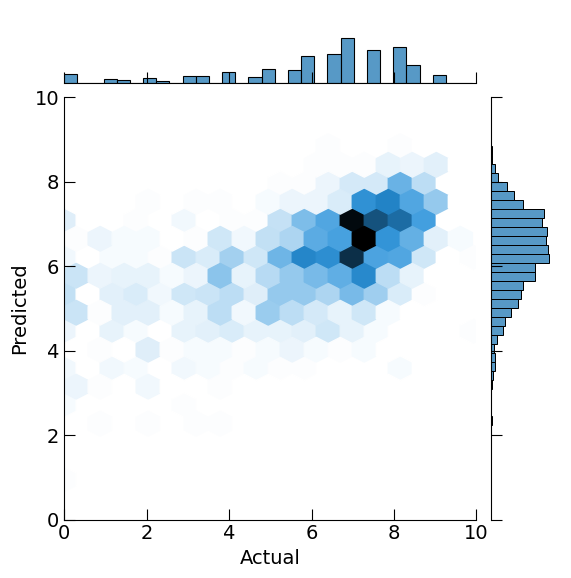

In [26]:
df_results = y_nw_valid.to_frame(name='actual')
df_results['predicted'] = model.predict(X_nw_valid)

sns.jointplot(data=df_results, x='actual', y='predicted', kind='hex', gridsize=17)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('2_day_mesowest_hexplot.png', dpi=300,bbox_inches='tight');

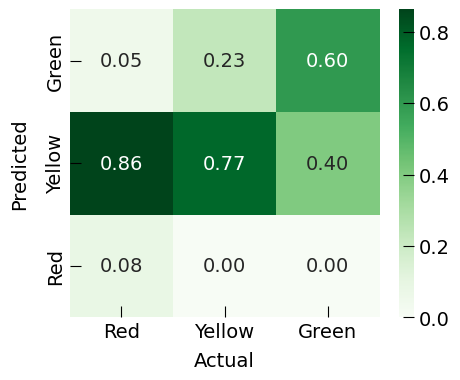

In [18]:
## Generate confusion matrix
## Red = 0-3.5, yellow = 4.0-6.5, green = 7.0 - 10

def results(x):
    if x.actual <= 3.5:
        if x.predicted <= 3.5:
            return 'RR'
        elif 6.66 < x.predicted:
            return 'RG'
        else:
            return 'RY'
    
    elif 6.66 < x.actual:
        if x.predicted <= 3.5:
            return 'GR'
        elif 6.66 < x.predicted:
            return 'GG'
        else:
            return 'GY'
        
    else:
        if x.predicted <= 3.5:
            return 'YR'
        elif 6.66 < x.predicted:
            return 'YG'
        else:
            return 'YY'
        
df_results['label'] = df_results.apply(lambda x: results(x), axis=1)
  
total_Y = float(len(df_results.query("label == 'YR' or label == 'YY' or label == 'YG'")))
total_G = float(len(df_results.query("label == 'GR' or label == 'GY' or label == 'GG'")))
total_R = float(len(df_results.query("label == 'RR' or label == 'RY' or label == 'RG'")))
  
results_matrix = [[len(df_results.query("label == 'RG'")) / total_R, len(df_results.query("label == 'YG'")) / total_Y, len(df_results.query("label == 'GG'")) / total_G],
                 [len(df_results.query("label == 'RY'")) / total_R, len(df_results.query("label == 'YY'")) / total_Y, len(df_results.query("label == 'GY'")) / total_G],
                 [len(df_results.query("label == 'RR'")) / total_R, len(df_results.query("label == 'YR'")) / total_Y, len(df_results.query("label == 'GR'")) / total_G]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='.2f', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Green', 'Yellow', 'Red'],
           cmap='Greens')

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12);

#ax.set(xlabel='Actual', ylabel='Predicted')
#plt.savefig('pseudo_confusion_matrix_error_NW_model.png', dpi=300)
plt.savefig('2_day_mesowest_pseudo_confusion_matrix_error_greens.png', dpi=300, bbox_inches='tight')

# Linear Regression 

In [8]:
from sklearn.preprocessing import StandardScaler

s_y = df['south_rating'] 
k_y = df['kaanapali_rating']
nw_y = df['northwest_rating']
df_x = df.drop(['south_rating','kaanapali_rating', 'northwest_rating'], axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.model_selection import train_test_split

X_s_train, X_s_valid, y_s_train, y_s_valid = train_test_split(df_x, s_y, train_size=0.2)
X_k_train, X_k_valid, y_k_train, y_k_valid = train_test_split(df_x, k_y, train_size=0.2)
X_nw_train, X_nw_valid, y_nw_train, y_nw_valid = train_test_split(df_x, nw_y, train_size=0.2)

In [219]:
s_lin_model = LinearRegression()
s_lin_model.fit(X_s_train, y_s_train)
print(s_lin_model.score(X_s_valid, y_s_valid))
print(s_lin_model.score(X_s_train, y_s_train))

-0.024984139005835404
0.6609953127390414


In [220]:
k_lin_model = LinearRegression()
k_lin_model.fit(X_k_train, y_k_train)
print(k_lin_model.score(X_k_valid, y_k_valid))
print(k_lin_model.score(X_k_train, y_k_train))

-0.06360254250772046
0.7056700206558902


In [221]:
nw_lin_model = LinearRegression()
nw_lin_model.fit(X_nw_train, y_nw_train)
print(nw_lin_model.score(X_nw_valid, y_nw_valid))
print(nw_lin_model.score(X_nw_train, y_nw_train))

0.445802875937096
0.7412072150938871


In [162]:
nw_scaled_lin_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', LinearRegression())
])
nw_scaled_lin_model.fit(X_nw_train, y_nw_train)


Pipeline(steps=[('scale', StandardScaler()), ('fit', LinearRegression())])

In [169]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(data = np.abs(nw_scaled_lin_model[1].coef_), index= X_nw_train.columns).sort_values(ascending=False))

51001_WSPD_mean     6.924021
51001_GST_mean      6.906335
51000_GST_mean      4.231624
51000_WSPD_mean     4.100070
51101_GST_mean      3.118476
51101_WSPD_mean     2.853173
51101_GST_std       1.576182
kwhh1_GST_mean      1.436988
51101_WSPD_std      1.392651
51003_GST_mean      1.376323
51003_WSPD_mean     1.223598
kwhh1_WSPD_mean     1.075303
51001_APD_mean      1.007386
kwhh1_GST_std       0.969357
51002_WSPD_std      0.784369
51002_GST_std       0.726277
kwhh1_WSPD_std      0.648843
51004_PRES_mean     0.588977
51002_PRES_mean     0.582830
51002_WVHT_mean     0.567120
klih1_GST_mean      0.498409
51101_DPD_mean      0.486458
51101_APD_mean      0.474283
51101_PRES_mean     0.457004
51002_DPD_mean      0.448102
51004_WSPD_std      0.436475
USW00022516_TMIN    0.425461
51101_APD_std       0.416863
klih1_WSPD_mean     0.414676
51004_GST_mean      0.406064
51101_WVHT_mean     0.401666
51000_PRES_mean     0.400002
51000_APD_mean      0.394722
51001_DPD_mean      0.378537
51004_GST_std 

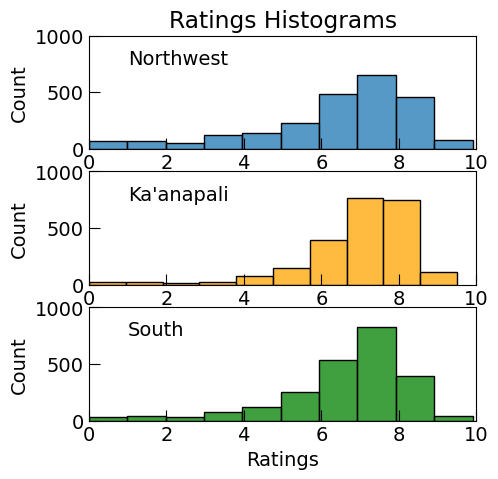

In [36]:
fig, axes = plt.subplots(3)

sns.histplot(nw_y, bins=10, ax=axes[0]);
sns.histplot(k_y, bins=10, ax=axes[1], color='orange')
sns.histplot(s_y, bins=10, ax=axes[2], color='green')
axes[0].set_ylim(0,1000)
axes[1].set_ylim(0,1000)
axes[2].set_ylim(0,1000)
axes[0].set_title('Ratings Histograms')
axes[0].text(1,750, 'Northwest')
axes[1].text(1,750, "Ka'anapali")
axes[2].text(1,750, 'South')
axes[2].set_xlabel('Ratings');

In [31]:
plt.style.use("/Users/jkharada/software/jayehat.mplstyle")

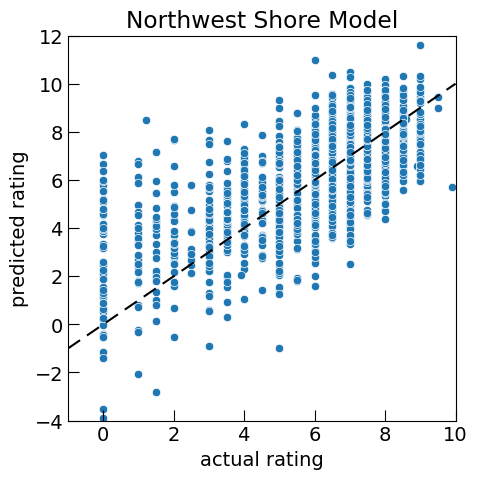

In [279]:
sns.scatterplot(x=y_nw_valid, y=nw_lin_model.predict(X_nw_valid));
sns.lineplot(x=[-1, 10], y=[-1,10],color='black', dashes=(7,4))
plt.ylabel('predicted rating')
plt.xlabel('actual rating')
plt.title('Northwest Shore Model')
plt.xlim(-1,10);
plt.savefig('prelim_nw_lin_model.png')

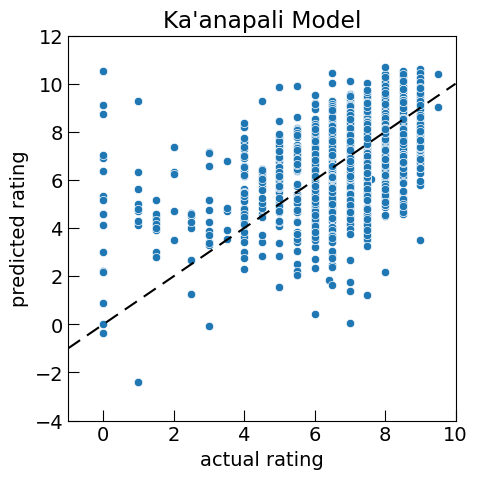

In [280]:
sns.lineplot(x=[-1,10], y=[-1,10], color='black', dashes=(7,4))
sns.scatterplot(x=y_k_valid, y=k_lin_model.predict(X_k_valid));
plt.ylabel('predicted rating');
plt.xlabel('actual rating')
plt.title("Ka'anapali Model");
plt.xlim(-1,10);
plt.savefig('prelim_k_lin_model.png')

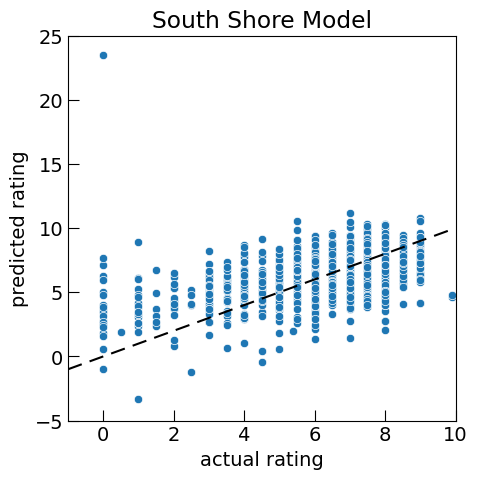

In [281]:
sns.scatterplot(x=y_s_valid, y=s_lin_model.predict(X_s_valid));
sns.lineplot(x=[-1,10], y=[-1,10], color='black', dashes=(7,4))
plt.ylabel('predicted rating')
plt.xlabel('actual rating')
plt.title('South Shore Model');
plt.xlim(-1,10)
plt.savefig('prelim_s_lin_model.png')

In [118]:
## Ridge model 
from sklearn.linear_model import RidgeCV

nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[150,200, 250, 300, 400], n_splits))
])
nw_scaled_ridge_model.fit(X_nw_train, y_nw_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('fit', RidgeCV(alphas=[150, 200, 250, 300, 400]))])

In [119]:
print(nw_scaled_ridge_model.score(X_nw_train, y_nw_train))
print(nw_scaled_ridge_model.score(X_nw_valid, y_nw_valid))

0.6313377424356152
0.5398407682603454


In [120]:
nw_scaled_ridge_model[1].alpha_

250

In [127]:
## Ridge model with filtered data
from sklearn.linear_model import RidgeCV

nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[0.008,0.009, 0.01, 0.02, 0.03]))
])
nw_scaled_ridge_model.fit(X_nw_filt_train, y_nw_filt_train)

print(nw_scaled_ridge_model.score(X_nw_filt_train, y_nw_filt_train))
print(nw_scaled_ridge_model.score(X_nw_filt_valid, y_nw_filt_valid))

nw_scaled_ridge_model[1].alpha_

0.6631779161816269
0.557576199231779


0.02

# XGBoost testing

In [15]:
import xgboost as xgb

In [16]:
nw_xgb_model = xgb.XGBRegressor(n_jobs=2, max_depth=4, n_estimators=300, reg_lambda=120, reg_alpha=8)

In [17]:
nw_xgb_model = xgb.XGBRegressor(n_jobs=2, max_depth=4, n_estimators=300, reg_lambda=120, reg_alpha=8)
from sklearn.model_selection import GridSearchCV
nw_xgb_cv = GridSearchCV(nw_xgb_model, {'max_depth': [4],
                                      'n_estimators': [300],
                                        'lambda': [100, 110, 120, 130, 140],
                                        'alpha': [6, 8, 10]
                                       },
                          verbose=1,
                          n_jobs=2)



In [18]:
nw_xgb_cv.fit(X_nw_prev_train, y_nw_prev_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


KeyboardInterrupt: 

In [131]:
print(nw_xgb_cv.best_score_)
print(nw_xgb_cv.best_params_)

0.5184152354445113
{'alpha': 8, 'lambda': 120, 'max_depth': 4, 'n_estimators': 300}


In [19]:
nw_xgb_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_xgb_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_xgb_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.9606377130811992
0.576528745550336


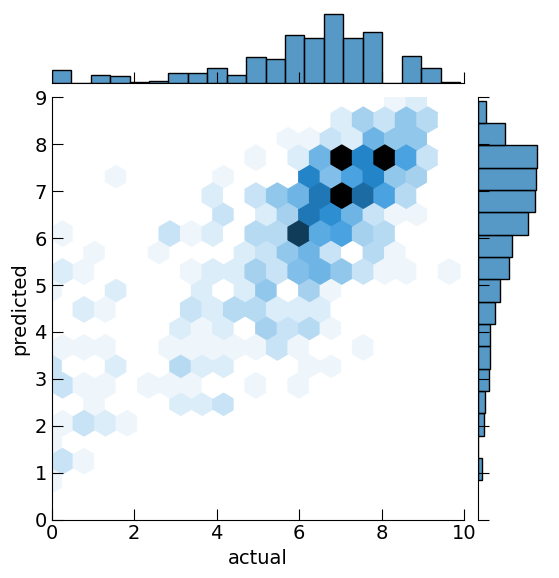

In [138]:
df_xgb_results = y_nw_prev_valid.to_frame(name='actual')
df_xgb_results['predicted'] = nw_xgb_model.predict(X_nw_prev_valid)

sns.jointplot(data=df_xgb_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);

Text(33.08333333333333, 0.5, 'Predicted')

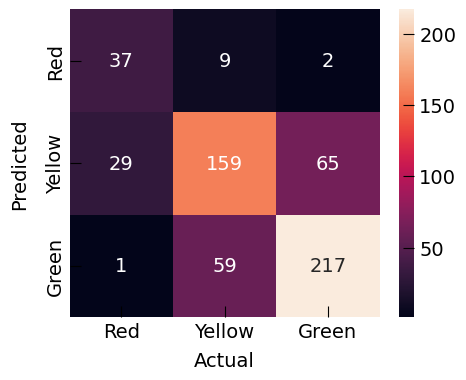

In [139]:
df_xgb_results['label'] = df_xgb_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_xgb_results.query("label == 'RR'")), len(df_xgb_results.query("label == 'YR'")), len(df_xgb_results.query("label == 'GR'"))],
                 [len(df_xgb_results.query("label == 'RY'")), len(df_xgb_results.query("label == 'YY'")), len(df_xgb_results.query("label == 'GY'"))],
                 [len(df_xgb_results.query("label == 'RG'")),len(df_xgb_results.query("label == 'YG'")), len(df_xgb_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)

In [102]:
X_nw_filt_train, X_nw_filt_valid, y_nw_filt_train, y_nw_filt_valid = train_test_split(df_x_filtered, nw_y, test_size=0.2)

nw_xgb_model.fit(X_nw_filt_train, y_nw_filt_train)
print(nw_xgb_model.score(X_nw_filt_train, y_nw_filt_train))
print(nw_xgb_model.score(X_nw_filt_valid, y_nw_filt_valid))

0.7563762065675509
0.5587225783681796


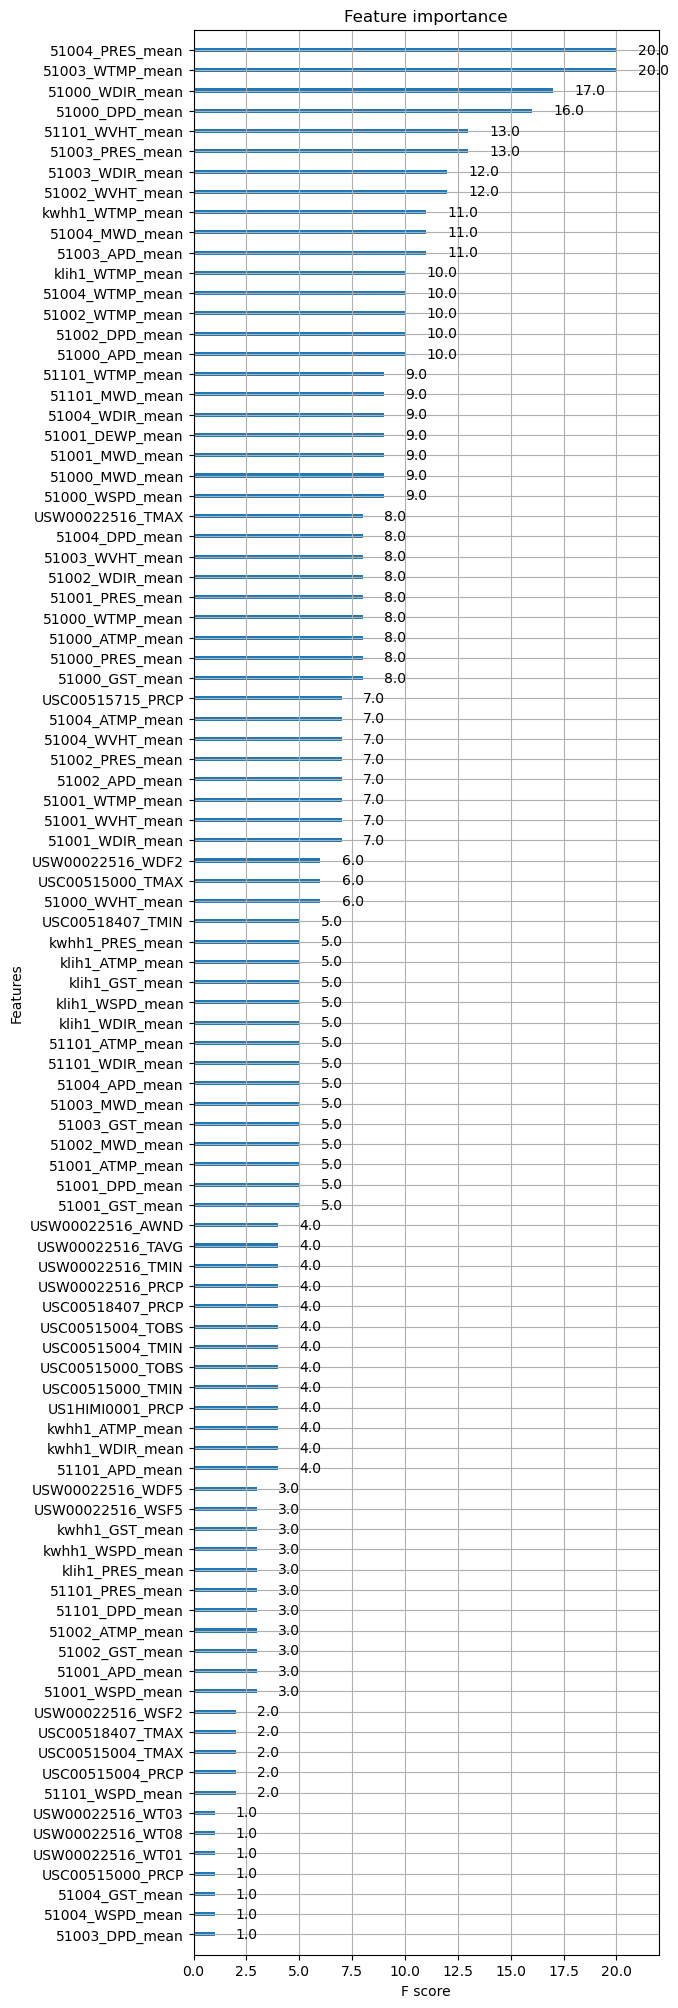

In [88]:
fig, ax = plt.subplots(figsize=(6,25))

xgb.plot_importance(nw_xgb_model, ax=ax);

In [52]:
xgb_model.score(X_s_valid, y_s_valid)

0.2898418057131745

Remove std devs from the features

In [70]:
df_x_filtered = df_x[[col for col in df_x.columns if 'std' not in col]]

In [93]:
s_xgb_model = xgb.XGBRegressor(n_jobs=2, max_depth=2, n_estimators=50)

X_s_filt_train, X_s_filt_valid, y_s_filt_train, y_s_filt_valid = train_test_split(df_x_filtered, s_y, test_size=0.2)

s_xgb_model.fit(X_s_filt_train, y_s_filt_train)
print(s_xgb_model.score(X_s_filt_train, y_s_filt_train))
print(s_xgb_model.score(X_s_filt_valid, y_s_filt_valid))

0.6264248637177352
0.41525690249511793


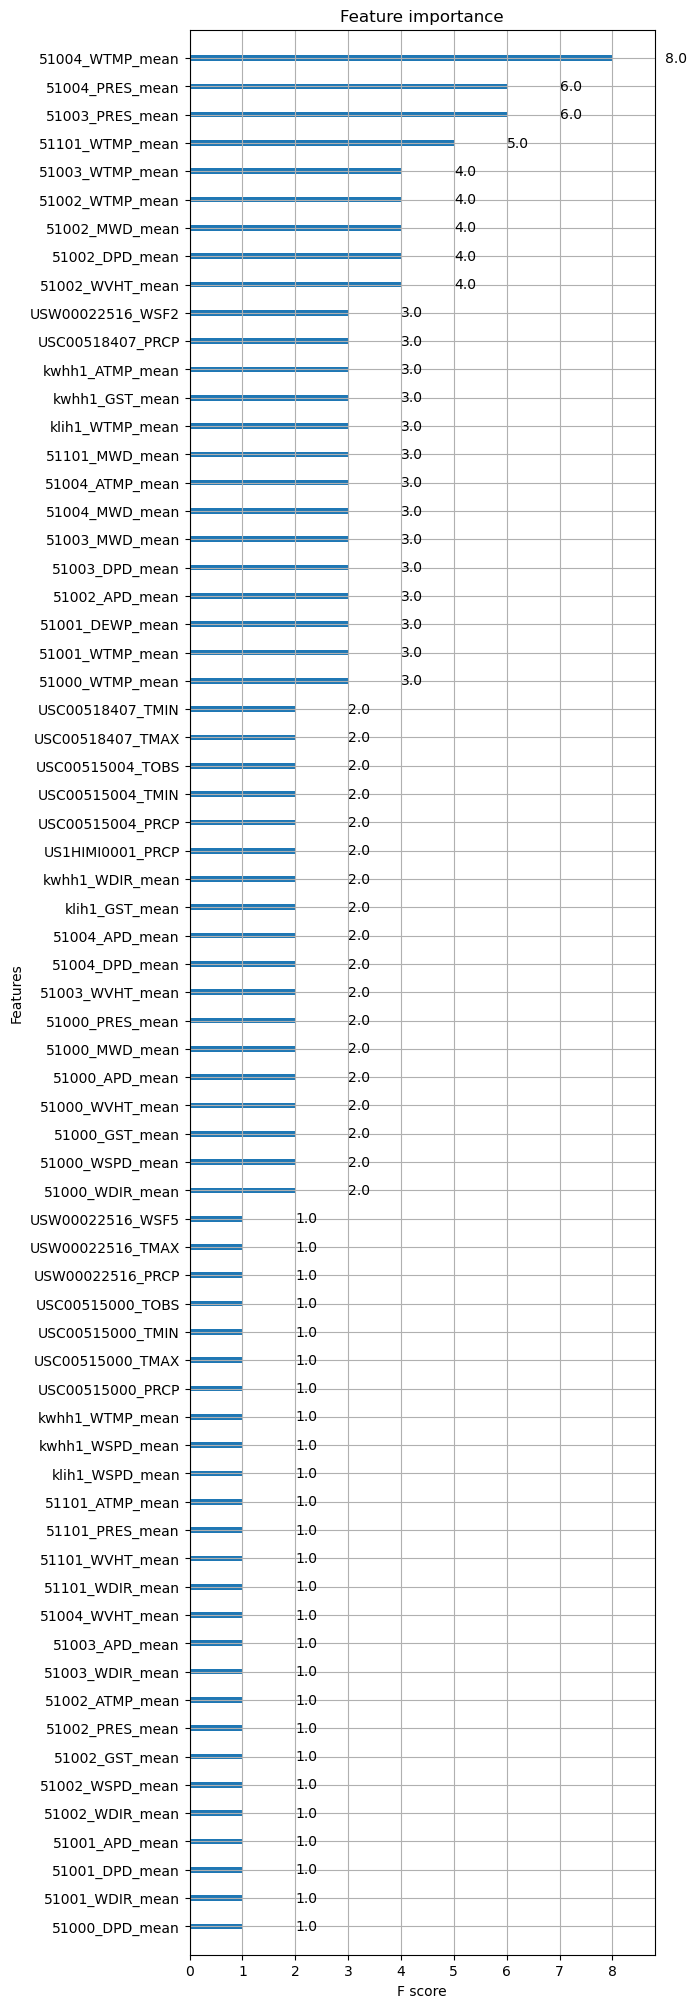

In [90]:
fig, ax = plt.subplots(figsize=(6,25))

xgb.plot_importance(s_xgb_model, ax=ax);

# Predicting scores based on previous day's data

In [11]:
"""
In order to properly increment data (ie using previous day's data for tomorrow's score)
we must increment the feature's index by one day and join it with the nw_y data again.
""" 
df_x_filtered = df_x[[col for col in df_x.columns if 'std' not in col]]
df_prev_day = df_x_filtered
df_prev_day.index = df_x_filtered.index + pd.Timedelta(days=1)
df_temp = nw_y.to_frame().join([df_prev_day], how='inner')
y_nw_prev_day = df_temp['northwest_rating']
df_prev_day_feat = df_temp.drop('northwest_rating', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

X_nw_prev_train, X_nw_prev_valid, y_nw_prev_train, y_nw_prev_valid = train_test_split(df_prev_day_feat, y_nw_prev_day, test_size=0.2)

In [13]:
## Ridge model with filtered data
from sklearn.linear_model import RidgeCV

nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1]))
])

In [14]:
nw_scaled_ridge_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_scaled_ridge_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_scaled_ridge_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.5364799591115585
0.5111862772296816


In [15]:
nw_scaled_ridge_model.predict(X_nw_prev_valid)
type(y_nw_prev_valid)

pandas.core.series.Series

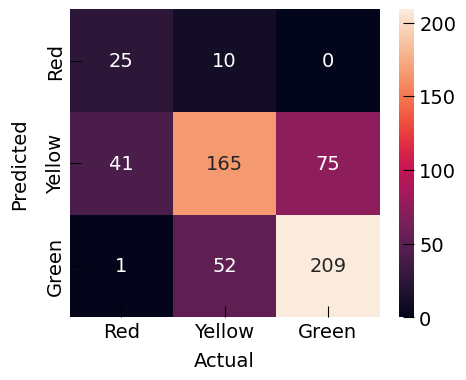

In [104]:
## Generate confusion matrix
## Red = 0-3.5, yellow = 4.0-6.5, green = 7.0 - 10

nw_scaled_ridge_model.fit(X_nw_prev_train, y_nw_prev_train)
df_ridge_results = y_nw_prev_valid.to_frame(name='actual')
df_ridge_results['predicted'] = nw_scaled_ridge_model.predict(X_nw_prev_valid)

def results(x):
    if x.actual <= 3.5:
        if x.predicted <= 3.5:
            return 'RR'
        elif 6.66 < x.predicted:
            return 'RG'
        else:
            return 'RY'
    
    elif 6.66 < x.actual:
        if x.predicted <= 3.5:
            return 'GR'
        elif 6.66 < x.predicted:
            return 'GG'
        else:
            return 'GY'
        
    else:
        if x.predicted <= 3.5:
            return 'YR'
        elif 6.66 < x.predicted:
            return 'YG'
        else:
            return 'YY'
        
df_ridge_results['label'] = df_ridge_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_ridge_results.query("label == 'RR'")), len(df_ridge_results.query("label == 'YR'")), len(df_ridge_results.query("label == 'GR'"))],
                 [len(df_ridge_results.query("label == 'RY'")), len(df_ridge_results.query("label == 'YY'")), len(df_ridge_results.query("label == 'GY'"))],
                 [len(df_ridge_results.query("label == 'RG'")),len(df_ridge_results.query("label == 'YG'")), len(df_ridge_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)
#ax.set(xlabel='Actual', ylabel='Predicted')
plt.savefig('pseudo_confusion_matrix_error_NW_model.png', dpi=300)

In [27]:
plt.style.use("/Users/jkharada/software/jayehat.mplstyle")

In [25]:
with pd.option_context('display.max_rows', None):
    display(df_results.query("label == 'GY'"))

,actual,predicted,label
2021-05-03,7.0,5.824226,GY
2016-12-29,7.0,6.350237,GY
2022-06-21,7.5,6.446363,GY
2023-02-20,7.0,5.700911,GY
2016-12-12,7.0,4.809557,GY
2022-03-28,7.0,5.862203,GY
2016-10-25,7.0,6.547379,GY
2018-11-20,7.0,5.935367,GY
2016-10-31,7.0,5.492685,GY
2021-09-13,7.5,6.093839,GY


In [32]:
# Hexplot showing error
sns.jointplot(data=df_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);
plt.savefig('Hexbins_error_NW_model_ridge.png', dpi=300)

NameError: name 'df_results' is not defined

In [20]:
from sklearn.preprocessing import PolynomialFeatures

nw_scaled_poly_ridge_model = Pipeline([
    ('polynomials', PolynomialFeatures()),
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[400, 450, 500, 550, 600,]))
])

In [21]:
# Model doesn't perform significantly better than linear regression

nw_scaled_poly_ridge_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_scaled_poly_ridge_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_scaled_poly_ridge_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.6184405986838316
0.48084724777470944


Model doesn't perform significantly better with polynomial patterns than linear regression

<AxesSubplot: xlabel='northwest_rating', ylabel='Count'>

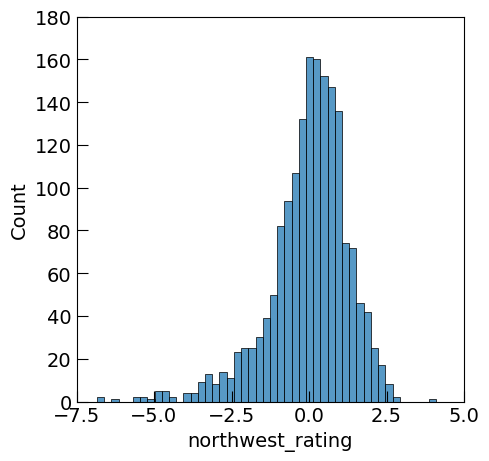

In [80]:
## Fit residuals

residuals = y_nw_prev_train - nw_scaled_poly_ridge_model.predict(X_nw_prev_train)


Fit residuals with nonlinear model 

In [22]:
import xgboost as xgb

nw_xgb_residual_model = xgb.XGBRegressor(n_jobs=2, max_depth=2, n_estimators=25)

from sklearn.model_selection import GridSearchCV
nw_xgb_cv = GridSearchCV(nw_xgb_residual_model, {'max_depth': [2, 4, 6],
                                      'n_estimators': [10, 25, 50, 75]},
                          verbose=1,
                          n_jobs=2)

In [86]:
nw_xgb_cv.fit(residuals, y_nw_prev_train)
print(nw_xgb_cv.best_score_)
print(nw_xgb_cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.4921507937521694
{'max_depth': 2, 'n_estimators': 25}


In [23]:
from sklearn.base import BaseEstimator, RegressorMixin

class FitResiduals(BaseEstimator, RegressorMixin):
    def __init__(self, sub_predictor, res_predictor):
        self.sub_predictor = sub_predictor
        self.res_predictor = res_predictor
        
    def fit(self, X, y):
        self.sub_predictor.fit(X, y)
        residual = y - self.sub_predictor.predict(X)
        self.res_predictor.fit(X, residual)
        return self
    
    def predict(self, X):
        residuals = self.res_predictor.predict(X)
        return self.sub_predictor.predict(X) + residuals


In [24]:
residual_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', FitResiduals(RidgeCV(alphas=np.linspace(0.1,1,10)), nw_xgb_residual_model))
])

In [25]:
residual_model.fit(X_nw_prev_train, y_nw_prev_train)
print(residual_model.score(X_nw_prev_train, y_nw_prev_train))
print(residual_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.6317486413662927
0.5249435863653428


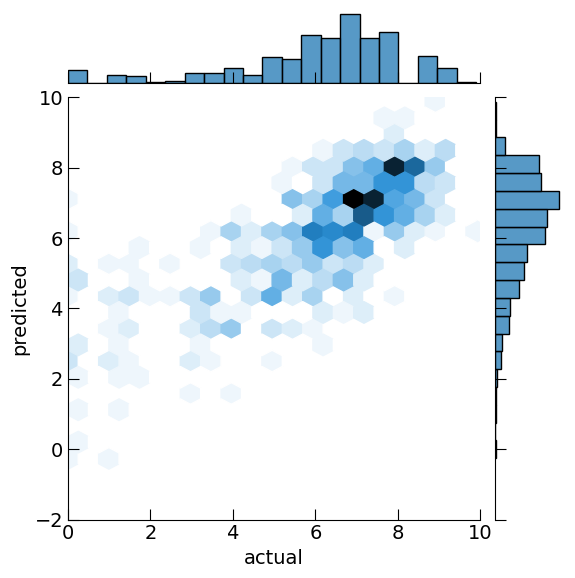

In [102]:
df_results = y_nw_prev_valid.to_frame(name='actual')
df_results['predicted'] = residual_model.predict(X_nw_prev_valid)

sns.jointplot(data=df_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);

Text(33.08333333333333, 0.5, 'Predicted')

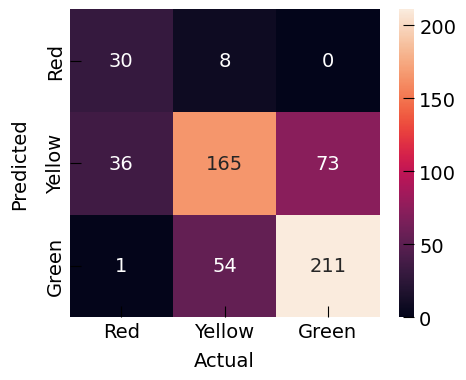

In [103]:
df_results['label'] = df_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_results.query("label == 'RR'")), len(df_results.query("label == 'YR'")), len(df_results.query("label == 'GR'"))],
                 [len(df_results.query("label == 'RY'")), len(df_results.query("label == 'YY'")), len(df_results.query("label == 'GY'"))],
                 [len(df_results.query("label == 'RG'")),len(df_results.query("label == 'YG'")), len(df_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)

# Lasso model

In [76]:
# Lasso model
from sklearn.linear_model import LassoCV

nw_lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(max_iter=10_000))
])

nw_lasso_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_lasso_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_lasso_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.5569403457135027
0.4459151575006184


In [77]:
nw_lasso_model[1].alpha_

0.001111784939009951

# Average models

In [26]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import TransformerMixin

class ModelTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model):
        # What needs to be done here?
        self.model = model
    
    def fit(self, X, y):
        # Fit the stored predictor.
        # Question: what should be returned?
        self.model.fit(X,y)
        return self
    
    def transform(self, X):
        # Use predict on the stored predictor as a "transformation".
        # Be sure to return a 2-D array.
        transformation = self.model.predict(X)
        return [ [pred] for pred in transformation ]

nw_ridge_trans = ModelTransformer(nw_scaled_ridge_model)
nw_xgb_trans = ModelTransformer(nw_xgb_model)
nw_residual_trans = ModelTransformer(nw_xgb_residual_model)

union = FeatureUnion([
    ('ridge', nw_ridge_trans),
#    ('xgb', nw_xgb_trans),
    ('residuals', nw_residual_trans)
])
full_model = Pipeline([
    ('get_fits', union),
    ('lin_regression', RidgeCV(alphas=[0.1, 1, 10, 100, 400]))
])

In [27]:
full_model.fit(X_nw_prev_train, y_nw_prev_train)

Pipeline(steps=[('get_fits',
                 FeatureUnion(transformer_list=[('ridge',
                                                 ModelTransformer(model=Pipeline(steps=[('scale',
                                                                                         StandardScaler()),
                                                                                        ('fit',
                                                                                         RidgeCV(alphas=[0.01,
                                                                                                         0.02,
                                                                                                         0.03,
                                                                                                         0.04,
                                                                                                         0.05,
                                                                                                         0.06,
                                                                                                         0.07,
                                                                                                         0.08,
                                                                                                         0.1]))]))),
                                                ('residuals',
                                                 ModelTransformer(model=XGBRegressor(base_score=None,
                                                                                     booster=None,
                                                                                     callbacks=None,
                                                                                     colsample_bylevel=None,
                                                                                     colsample_bynode=None,
                                                                                     cols...
                                                                                     interaction_constraints=None,
                                                                                     learning_rate=None,
                                                                                     max_bin=None,
                                                                                     max_cat_threshold=None,
                                                                                     max_cat_to_onehot=None,
                                                                                     max_delta_step=None,
                                                                                     max_depth=2,
                                                                                     max_leaves=None,
                                                                                     min_child_weight=None,
                                                                                     missing=nan,
                                                                                     monotone_constraints=None,
                                                                                     n_estimators=25,
                                                                                     n_jobs=2,
                                                                                     num_parallel_tree=None,
                                                                                     predictor=None,
                                                                                     random_state=None, ...)))])),
                ('lin_regression', RidgeCV(alphas=[0.1, 1, 10, 100, 400]))])

In [28]:
print(full_model.score(X_nw_prev_train, y_nw_prev_train))
print(full_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.5962502936732781
0.5573651771609276


AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

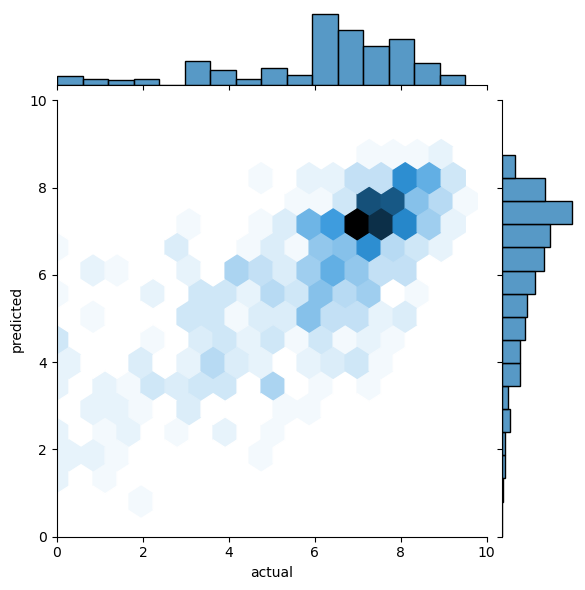

In [30]:
df_ensem_results = y_nw_prev_valid.to_frame(name='actual')
df_ensem_results['predicted'] = full_model.predict(X_nw_prev_valid)

sns.jointplot(data=df_ensem_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);
plt.ylim(0,10);
plt.save()

Text(33.08333333333333, 0.5, 'Predicted')

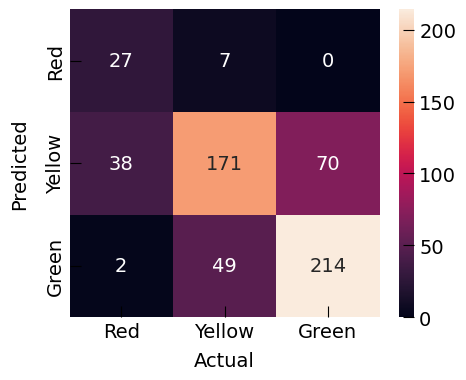

In [155]:
df_ensem_results['label'] = df_ensem_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_ensem_results.query("label == 'RR'")), len(df_ensem_results.query("label == 'YR'")), len(df_ensem_results.query("label == 'GR'"))],
                 [len(df_ensem_results.query("label == 'RY'")), len(df_ensem_results.query("label == 'YY'")), len(df_ensem_results.query("label == 'GY'"))],
                 [len(df_ensem_results.query("label == 'RG'")),len(df_ensem_results.query("label == 'YG'")), len(df_ensem_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)


In [33]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor([
    ('ridge', nw_scaled_ridge_model),
    ('xgb', nw_xgb_model),
    ('residual', nw_xgb_residual_model)
]
)

In [65]:
X_nw_prev_train, X_nw_prev_valid, y_nw_prev_train, y_nw_prev_valid = train_test_split(df_prev_day_feat, y_nw_prev_day, test_size=0.2)

In [66]:
voting_reg.fit(X_nw_prev_train, y_nw_prev_train)

VotingRegressor(estimators=[('ridge',
                             Pipeline(steps=[('scale', StandardScaler()),
                                             ('fit',
                                              RidgeCV(alphas=[0.01, 0.02, 0.03,
                                                              0.04, 0.05, 0.06,
                                                              0.07, 0.08,
                                                              0.1]))])),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=No...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=2,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=25, n_jobs=2,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [67]:
voting_reg.fit(X_nw_prev_train, y_nw_prev_train)
print(voting_reg.score(X_nw_prev_train, y_nw_prev_train))
print(voting_reg.score(X_nw_prev_valid, y_nw_prev_valid))

0.7697543367150544
0.5864724432369686


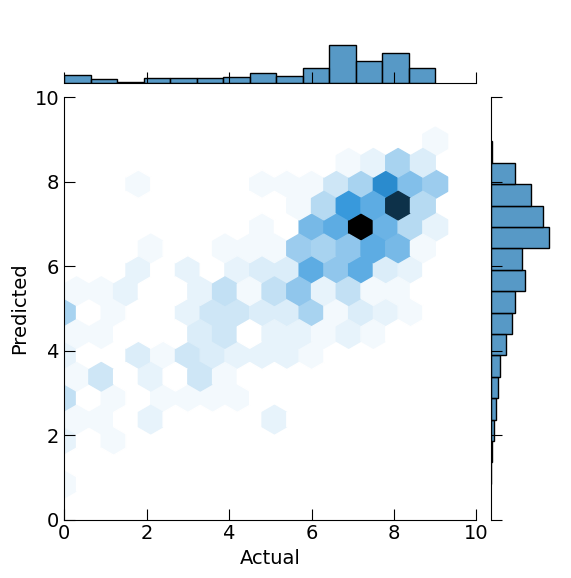

In [73]:
df_ensem_results = y_nw_prev_valid.to_frame(name='actual')
df_ensem_results['predicted'] = voting_reg.predict(X_nw_prev_valid)

sns.jointplot(data=df_ensem_results, x='actual', y='predicted', kind='hex')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(0,10);
plt.ylim(0,10);
plt.savefig('Hexbins_error_NW_model_ensemble.png', dpi=300, bbox_inches='tight')

In [38]:
def results(x):
    if x.actual <= 3.5:
        if x.predicted <= 3.5:
            return 'RR'
        elif 6.66 < x.predicted:
            return 'RG'
        else:
            return 'RY'
    
    elif 6.66 < x.actual:
        if x.predicted <= 3.5:
            return 'GR'
        elif 6.66 < x.predicted:
            return 'GG'
        else:
            return 'GY'
        
    else:
        if x.predicted <= 3.5:
            return 'YR'
        elif 6.66 < x.predicted:
            return 'YG'
        else:
            return 'YY'

In [42]:

total_R = len(df_ensem_results.query("label == 'RR' or label == 'RY' or label == 'RG'"))
total_R

87

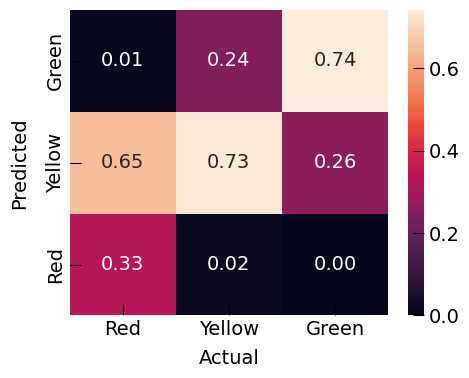

In [74]:
df_ensem_results['label'] = df_ensem_results.apply(lambda x: results(x), axis=1)

total_Y = float(len(df_ensem_results.query("label == 'YR' or label == 'YY' or label == 'YG'")))
total_G = float(len(df_ensem_results.query("label == 'GR' or label == 'GY' or label == 'GG'")))
total_R = float(len(df_ensem_results.query("label == 'RR' or label == 'RY' or label == 'RG'")))
  
results_matrix = [[len(df_ensem_results.query("label == 'RG'")) / total_R, len(df_ensem_results.query("label == 'YG'")) / total_Y, len(df_ensem_results.query("label == 'GG'")) / total_G],
                 [len(df_ensem_results.query("label == 'RY'")) / total_R, len(df_ensem_results.query("label == 'YY'")) / total_Y, len(df_ensem_results.query("label == 'GY'")) / total_G],
                 [len(df_ensem_results.query("label == 'RR'")) / total_R, len(df_ensem_results.query("label == 'YR'")) / total_Y, len(df_ensem_results.query("label == 'GR'")) / total_G]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='.2f', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Green', 'Yellow', 'Red'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)
plt.tight_layout()
plt.savefig('pseudo_confusion_matrix_NW_model_ensemble.png', dpi=300, bbox_inches='tight')